## introduction to NLP course

In [145]:
# ref. https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# download data from https://archive.ics.uci.edu/ml/machine-learning-databases/00228/

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\LENOVO\\Documents\\Python Scripts'

In [6]:
os.chdir('C:\\Users\\LENOVO\\Documents\\Python Scripts\\nltk')

In [7]:
os.chdir('C:\\Users\\LENOVO\\Documents\\Python Scripts\\nltk\\smsspamcollection')

In [8]:
os.listdir()

['readme', 'SMSSpamCollection.tsv']

In [9]:
rawData = open("SMSSpamCollection.tsv").read()

In [10]:
rawData[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [11]:
parsedData = rawData.replace('\t', '\n').split('\n')

In [12]:
parsedData[0:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [13]:
labelList = parsedData[0::2]
textList = parsedData[1::2]

In [14]:
labelList[0:10]

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam']

In [15]:
textList[0:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

In [16]:
import pandas as pd

In [17]:
'''


fullCorpus = pd.DataFrame({
    'label':labelList,
    'body_list': textList
})

ValueError: arrays must all be same length

'''

"\n\n\nfullCorpus = pd.DataFrame({\n    'label':labelList,\n    'body_list': textList\n})\n\nValueError: arrays must all be same length\n\n"

In [18]:
print(len(labelList))
print(len(textList))

5575
5574


In [19]:
print(labelList[-10:])

['ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', '']


In [20]:
fullCorpus = pd.DataFrame({
    'label':labelList[:-1],
    'body_list': textList
})

In [21]:
fullCorpus.head(3)

,label,body_list
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


## using read_csv

In [22]:
dataset = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [23]:
dataset.head(3)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [24]:
fullCorpus = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [25]:
fullCorpus.columns = ['label', 'body_text']

In [26]:
fullCorpus.head(3)

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [27]:
print("data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

data has 5572 rows and 2 columns


In [28]:
print('out of {} rows, {} are spams, {} are ham'.format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus['label']=='spam']),
                                                       len(fullCorpus[fullCorpus['label']=='ham'])))

out of 5572 rows, 747 are spams, 4825 are ham


In [29]:
print('number of null in label: {}'.format(fullCorpus['label'].isnull().sum()))

number of null in label: 0


In [30]:
print('number of null in text: {}'.format(fullCorpus['body_text'].isnull().sum()))

number of null in text: 0


## NLP basics - learning how to use regular expressions

In [31]:
import re

In [32]:
re_test = 'this is a made up string to test 2 differente regex methods'
re_test_messy = 'this    is made    up string to test 2    differente regex methods'
re_test_messy1 = 'this-is-a-made/up.string*to>>>>>>test-------2""""" different-regex-methods'

In [33]:
re.split('\s', re_test)

['this',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'differente',
 'regex',
 'methods']

In [34]:
re.split('\t', re_test_messy)

['this    is made    up string to test 2    differente regex methods']

In [35]:
re.split('\t', re_test_messy1)

['this-is-a-made/up.string*to>>>>>>test-------2""""" different-regex-methods']

In [36]:
re.split('\s', re_test_messy)

['this',
 '',
 '',
 '',
 'is',
 'made',
 '',
 '',
 '',
 'up',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'differente',
 'regex',
 'methods']

In [37]:
re.split('\s+', re_test_messy)

['this',
 'is',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'differente',
 'regex',
 'methods']

In [38]:
re.split('\W+', re_test_messy1)

['this',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [39]:
re.findall('\S+', re_test_messy)

['this',
 'is',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'differente',
 'regex',
 'methods']

In [40]:
re.findall('\S+', re_test_messy1)

['this-is-a-made/up.string*to>>>>>>test-------2"""""',
 'different-regex-methods']

In [41]:
re.findall('\W+', re_test_messy1)

['-', '-', '-', '/', '.', '*', '>>>>>>', '-------', '""""" ', '-', '-']

In [42]:
re.findall('\w+', re_test_messy1)

['this',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [43]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [44]:
import re

In [45]:
re.findall('[a-z]+', pep8_test)

['try', 'to', 'follow', 'guidelines']

In [46]:
re.findall('[A-Z]+', pep8_test)

['I', 'PEP']

In [47]:
re.findall('[A-Z0-9]+', pep8_test)

['I', 'PEP8']

In [48]:
re.findall('[A-Z] + [0-9]', pep8_test)

[]

In [49]:
re.findall('[A-Z] + [0-9]+', pep8_test)

[]

In [50]:
re.findall('[A-Z]+[0-9]+', pep8_test)

['PEP8']

In [51]:
pep8_test = 'I try to follow PEP8 guidelines'

In [52]:
re.sub('[A-Z]+[0-9]+', 'PEP_8 Python Styleguide', pep8_test)

'I try to follow PEP_8 Python Styleguide guidelines'

## implementing a basic pipeline to clean txt

In [53]:
# remove punctuation
# tokenitzation
# remove stopwords
# lemmatize / stem

In [54]:
import pandas as pd

In [55]:
pd.set_option('display.max_colwidth', 100)

In [56]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

In [57]:
data.columns = ['label', 'body_text']

In [58]:
data.head(3)

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...


In [59]:
import string

In [60]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
def remove_punct(text):
    text_nopunct = [char for char in text if char not in string.punctuation]
    return text_nopunct

In [62]:
data['body_text_cleaned'] = data['body_text'].apply(lambda x: remove_punct(x))
data.head(3)

,label,body_text,body_text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[G, o, , u, n, t, i, l, , j, u, r, o, n, g, , p, o, i, n, t, , c, r, a, z, y, , A, v, a, i,..."
1,ham,Ok lar... Joking wif u oni...,"[O, k, , l, a, r, , J, o, k, i, n, g, , w, i, f, , u, , o, n, i]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, , a, , w, k, l, y, , c, o, m, p, , t, o, , w,..."


In [63]:
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [64]:
data['body_text_cleaned'] = data['body_text'].apply(lambda x: remove_punct(x))
data.head(3)

,label,body_text,body_text_cleaned
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...


#### tokens

In [65]:
import re

In [66]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [67]:
data['body_text_tokenized'] = data['body_text_cleaned'].apply(lambda x: tokenize(x.lower()))

In [68]:
data.head(3)

,label,body_text,body_text_cleaned,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."


#### stopwords

In [69]:
import nltk

In [70]:
stopword = nltk.corpus.stopwords.words('english')

In [71]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

In [72]:
data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

In [73]:
data.head(3)

,label,body_text,body_text_cleaned,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."


In [74]:
re.findall('[A-Z]+', 'I like this test')

['I']

### suplemental data cleaning: stemming and lemmatizing

In [75]:
import nltk

In [76]:
ps = nltk.PorterStemmer()

In [77]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [78]:
print(ps.stem('learning'))
print(ps.stem('learns'))
print(ps.stem('learned'))

learn
learn
learn


In [79]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

In [80]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

In [81]:
data.head(3)

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,U dun say so early hor... U c already then say...


In [82]:
def clean_text(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [83]:
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

In [84]:
data.head(3)

,label,body_text,body_text_nostop
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"


In [85]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [86]:
data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

In [87]:
data.head(3)

,label,body_text,body_text_nostop,body_text_stemmed
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"


In [88]:
import nltk

In [89]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [90]:
# comparing stemming and lemmatizing

print(ps.stem('meanness'))
print(ps.stem('meaning'))
print('----------')
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

mean
mean
----------
meanness
meaning


In [91]:
# try with goose and geese

In [92]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

In [93]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

In [94]:
data.head(3)

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,U dun say so early hor... U c already then say...


In [95]:
def clean_text(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [96]:
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

In [97]:
data.head(3)

,label,body_text,body_text_nostop
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"


In [98]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [99]:
data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [100]:
data.head(3)

,label,body_text,body_text_nostop,body_text_lemmatized
0,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"


## vectorizing raw data

### count vectorization

In [101]:
import pandas as pd
import re
import string 
import nltk

In [102]:
pd.set_option('display.max_colwidth', 100)

In [103]:
stopwords = nltk.corpus.stopwords.words('english')

In [104]:
ps = nltk.PorterStemmer()

In [105]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

In [106]:
data.head(3)

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,U dun say so early hor... U c already then say...


In [107]:
def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [108]:
# applying count_vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [109]:
count_vect = CountVectorizer(analyzer=clean_text)

In [110]:
X_counts = count_vect.fit_transform(data['body_text'])

In [111]:
len(data)

5571

In [112]:
data.shape

(5571, 2)

In [113]:
X_counts.shape

(5571, 8107)

In [114]:
type(X_counts)

scipy.sparse.csr.csr_matrix

In [115]:
count_vect.get_feature_names()

['',
 '0',
 '008704050406',
 '0089mi',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '0

In [116]:
len(count_vect.get_feature_names())

8107

#### to visualize better, we will use small data

In [117]:
data_sample = data[0:5]
data_sample.shape

(5, 2)

In [118]:
len(data_sample)

5

In [119]:
data_sample.head()

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives around here though"
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...


In [120]:
count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])

In [121]:
X_counts_sample.shape

(5, 59)

In [122]:
count_vect_sample.get_feature_names()

['08452810075over18',
 '150',
 '2',
 '2005',
 '21st',
 '3',
 '87121',
 'alreadi',
 'appli',
 'around',
 'back',
 'c',
 'chg',
 'comp',
 'cup',
 'darl',
 'dont',
 'dun',
 'earli',
 'entri',
 'fa',
 'final',
 'free',
 'freemsg',
 'fun',
 'goe',
 'hey',
 'hor',
 'id',
 'joke',
 'lar',
 'like',
 'live',
 'may',
 'nah',
 'ok',
 'oni',
 'questionstd',
 'ratetc',
 'rcv',
 'receiv',
 'say',
 'send',
 'std',
 'still',
 'tb',
 'text',
 'think',
 'though',
 'tkt',
 'txt',
 'u',
 'usf',
 'week',
 'wif',
 'win',
 'wkli',
 'word',
 'xxx']

In [123]:
X_counts_sample.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [124]:
X_counts_sample.shape

(5, 59)

In [125]:
X_counts_sample.toarray().shape

(5, 59)

In [126]:
pd.DataFrame(X_counts_sample.toarray())

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,1,1,0,1,0,1,0,...,1,1,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [127]:
X_counts_sample_df = pd.DataFrame(X_counts_sample.toarray())

In [128]:
X_counts_sample_df.columns = count_vect_sample.get_feature_names()

In [129]:
X_counts_sample_df

,08452810075over18,150,2,2005,21st,3,87121,alreadi,appli,around,...,tkt,txt,u,usf,week,wif,win,wkli,word,xxx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,1,1,0,1,0,1,0,...,1,1,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


#### now, we will use n-gram approach

In [130]:
import pandas as pd
import re
import string 
import nltk

pd.set_option('display.max_colwidth', 100)

In [131]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [132]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

In [133]:
def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = ' '.join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [134]:
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head(3)

,label,body_text,cleaned_text
0,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say


In [135]:
# applying n-grams

from sklearn.feature_extraction.text import CountVectorizer

In [136]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(data['cleaned_text'])

In [137]:
X_counts.shape

(5571, 31295)

In [138]:
ngram_vect.get_feature_names()

['008704050406 sp',
 '0089mi last',
 '0121 2025050',
 '01223585236 xx',
 '01223585334 cum',
 '0125698789 ring',
 '02 user',
 '020603 2nd',
 '0207 153',
 '02072069400 bx',
 '02073162414 cost',
 '02085076972 repli',
 '020903 2nd',
 '021 3680',
 '021 3680offer',
 '050703 tcsbcm4235wc1n3xx',
 '06 good',
 '07046744435 arrang',
 '07090298926 reschedul',
 '07099833605 reschedul',
 '07123456789 87077',
 '0721072 find',
 '07732584351 rodger',
 '07734396839 ibh',
 '07742676969 show',
 '07753741225 show',
 '0776xxxxxxx uve',
 '077xxx 2000',
 '07801543489 guarante',
 '07808 xxxxxx',
 '07808247860 show',
 '07808726822 award',
 '07815296484 show',
 '0784987 show',
 '0789xxxxxxx today',
 '0796xxxxxx today',
 '07973788240 show',
 '07xxxxxxxxx 2000',
 '07xxxxxxxxx show',
 '0800 0721072',
 '0800 169',
 '0800 18',
 '0800 195',
 '0800 1956669',
 '0800 505060',
 '0800 542',
 '08000407165 18',
 '08000776320 repli',
 '08000839402 2stoptx',
 '08000839402 2stoptxt',
 '08000839402 call',
 '08000839402 call2opto

In [139]:
# small sample to visualize

data_sample = data[0:5]

In [140]:
ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])

In [141]:
X_counts_sample.shape

(5, 54)

In [142]:
ngram_vect_sample.get_feature_names()

['150 rcv',
 '2005 text',
 '21st may',
 '87121 receiv',
 'alreadi say',
 'appli 08452810075over18',
 'around though',
 'back id',
 'chg send',
 'comp win',
 'cup final',
 'darl week',
 'dont think',
 'dun say',
 'earli hor',
 'entri questionstd',
 'entri wkli',
 'fa 87121',
 'fa cup',
 'final tkt',
 'free entri',
 'freemsg hey',
 'fun still',
 'goe usf',
 'hey darl',
 'hor alreadi',
 'id like',
 'joke wif',
 'lar joke',
 'like fun',
 'live around',
 'may 2005',
 'nah dont',
 'ok lar',
 'ok xxx',
 'questionstd txt',
 'ratetc appli',
 'receiv entri',
 'say earli',
 'send 150',
 'std chg',
 'still tb',
 'tb ok',
 'text fa',
 'think goe',
 'tkt 21st',
 'txt ratetc',
 'usf live',
 'week word',
 'wif oni',
 'win fa',
 'wkli comp',
 'word back',
 'xxx std']

In [143]:
X_counts_sample_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_sample_df.columns = ngram_vect_sample.get_feature_names()

In [144]:
X_counts_sample_df

,150 rcv,2005 text,21st may,87121 receiv,alreadi say,appli 08452810075over18,around though,back id,chg send,comp win,...,think goe,tkt 21st,txt ratetc,usf live,week word,wif oni,win fa,wkli comp,word back,xxx std
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,1,0,1,0,0,0,1,...,0,1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1


#### tf-idf 

In [146]:
import pandas as pd
import re
import string
import nltk

In [147]:
pd.set_option('display.max_colwidth', 100)

In [148]:
stopwords = nltk.corpus.stopwords.words('english')

In [149]:
ps = nltk.PorterStemmer()

In [150]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')

In [151]:
data.columns = ['label', 'body_text']

In [152]:
data.head(3)

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,U dun say so early hor... U c already then say...


In [153]:
# cleaning the text

def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [154]:
# applying tfidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

In [157]:
X_tfidf.shape

(5571, 8107)

In [158]:
tfidf_vect.get_feature_names()

['',
 '0',
 '008704050406',
 '0089mi',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '0

In [159]:
# taking a sample

data_sample = data[0:10]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])

In [160]:
X_tfidf_sample.shape

(10, 121)

In [161]:
tfidf_vect_sample.get_feature_names()

['08002986030',
 '08452810075over18',
 '09061701461',
 '11',
 '12',
 '150',
 '2',
 '2005',
 '21st',
 '3',
 '87121',
 '9',
 '900',
 'aid',
 'alreadi',
 'anymor',
 'appli',
 'around',
 'back',
 'brother',
 'c',
 'call',
 'caller',
 'callertun',
 'camera',
 'chg',
 'claim',
 'co',
 'code',
 'colour',
 'comp',
 'copi',
 'cri',
 'cup',
 'custom',
 'darl',
 'dont',
 'dun',
 'earli',
 'enough',
 'entitl',
 'entri',
 'even',
 'fa',
 'final',
 'free',
 'freemsg',
 'friend',
 'fun',
 'goe',
 'gonna',
 'hey',
 'home',
 'hor',
 'hour',
 'id',
 'im',
 'ive',
 'joke',
 'k',
 'kl341',
 'lar',
 'latest',
 'like',
 'live',
 'may',
 'mell',
 'minnaminungint',
 'mobil',
 'month',
 'nah',
 'network',
 'nurungu',
 'ok',
 'oni',
 'oru',
 'patent',
 'per',
 'press',
 'prize',
 'questionstd',
 'r',
 'ratetc',
 'rcv',
 'receiv',
 'receivea',
 'request',
 'reward',
 'say',
 'select',
 'send',
 'set',
 'soon',
 'speak',
 'std',
 'still',
 'stuff',
 'talk',
 'tb',
 'text',
 'think',
 'though',
 'tkt',
 'today',
 

In [162]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df

,08002986030,08452810075over18,09061701461,11,12,150,2,2005,21st,3,...,valu,vettam,want,week,wif,win,winner,wkli,word,xxx
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.435368,0.000000,0.000000,0.000000,0.00000,0.00000
1,0.000000,0.193446,0.000000,0.000000,0.000000,0.00000,0.193446,0.193446,0.193446,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.193446,0.000000,0.193446,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.23284,0.000000,0.000000,0.000000,0.23284,...,0.000000,0.000000,0.00000,0.23284,0.000000,0.000000,0.000000,0.000000,0.23284,0.23284
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.223607,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
7,0.000000,0.000000,0.225174,0.000000,0.225174,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.225174,0.000000,0.00000,0.00000,0.000000,0.000000,0.225174,0.000000,0.00000,0.00000
8,0.195492,0.000000,0.000000,0.195492,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.26062,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


### feature engineering

In [163]:
import pandas as pd

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

In [165]:
# create feature based on lenght of the msm

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))

data.head(3)

,label,body_text,body_len
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,U dun say so early hor... U c already then say...,39


In [166]:
# creating feature based on punctuation

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(' ')), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head(3)

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4


#### evaluating if the features created add value for the spam classifier

In [167]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


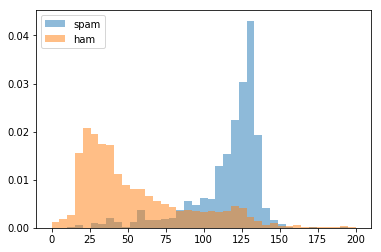

In [168]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


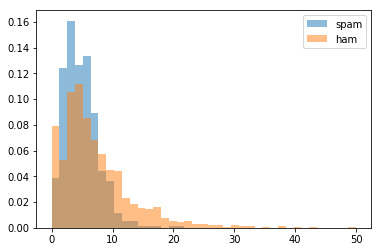

In [169]:
bins = np.linspace(0,50,40)

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

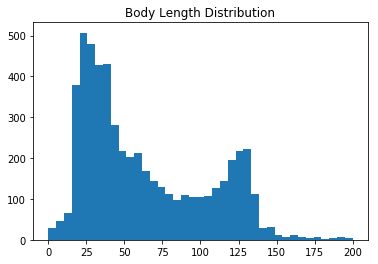

In [170]:
# evaluating if features created are feasible to be transformed

bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

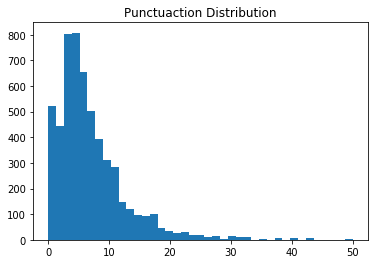

In [171]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title('Punctuaction Distribution')
pyplot.show()

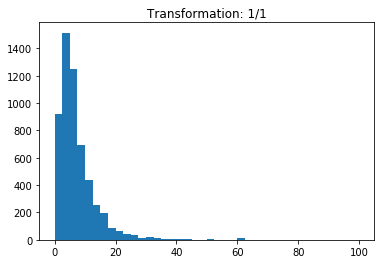

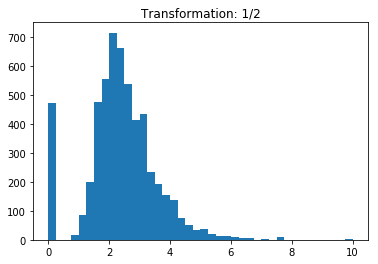

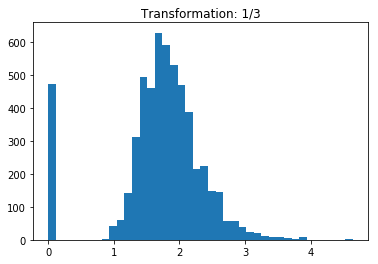

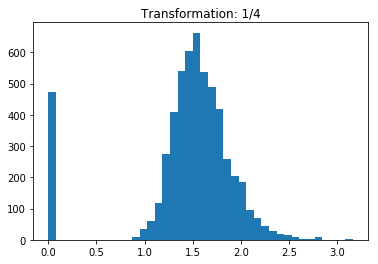

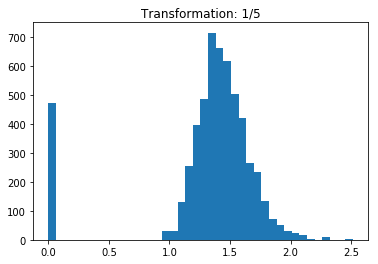

In [172]:
# observing differents transformations 

for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40)
    pyplot.title('Transformation: 1/{}'.format(str(i)))
    pyplot.show()

## ensemble learning with random forest 

In [173]:
import nltk
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [174]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [175]:
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

In [176]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(' ')), 3)*100

In [177]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

In [178]:
def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [179]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

In [180]:
X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
dir(RandomForestClassifier) # see method and variables

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params']

In [183]:
RandomForestClassifier() # see hyper paraments

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [185]:
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.967713  , 0.97396768, 0.96947935, 0.96229803, 0.96588869])

#### explore random forest through holdout set

In [186]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [190]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06818300458974208, 'body_len'),
 (0.049840439388723755, 1804),
 (0.03821715818661809, 2032),
 (0.03182494863695787, 4799),
 (0.02871545737421806, 3135),
 (0.028218777982029004, 6288),
 (0.027558145704519955, 5727),
 (0.02742821140737629, 7353),
 (0.01840506238812213, 5991),
 (0.016566214250200353, 2172)]

In [191]:
y_pred = rf_model.predict(X_test)

In [192]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [194]:
print('precision: {} / recall: {} / accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred), 3)))

precision: 1.0 / recall: 0.622 / accuracy: 0.952


#### using grid search 

In [195]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('est: {} / depth: {} --- precision: {} / recall: {} / accuracy: {}'.format(
       n_est, depth, round(precision, 3), round(recall, 3), 
       round((y_pred==y_test).sum() / len(y_pred), 3)))

In [196]:
for n_est in [10, 50]:
    for depth in [10, 20, None]:
        train_RF(n_est, depth)

est: 10 / depth: 10 --- precision: 1.0 / recall: 0.301 / accuracy: 0.91
est: 10 / depth: 20 --- precision: 1.0 / recall: 0.538 / accuracy: 0.941
est: 10 / depth: None --- precision: 1.0 / recall: 0.839 / accuracy: 0.979
est: 50 / depth: 10 --- precision: 1.0 / recall: 0.238 / accuracy: 0.902
est: 50 / depth: 20 --- precision: 1.0 / recall: 0.608 / accuracy: 0.95
est: 50 / depth: None --- precision: 1.0 / recall: 0.86 / accuracy: 0.982


#### using cv_grid_search

In [197]:
# testign two options : tf-idf and count_vectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [199]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 50],
        'max_depth': [30, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,13.467369,2.398373,0.227776,0.029303,None,50,"{'max_depth': None, 'n_estimators': 50}",0.977578,0.977578,0.976661,...,0.974690,0.003747,1,1.000000,0.999776,0.999776,1.000000,1.000000,0.999910,0.000110
2,6.471372,0.283042,0.266105,0.019731,None,10,"{'max_depth': None, 'n_estimators': 10}",0.974888,0.964126,0.965889,...,0.967690,0.004103,2,0.996409,0.997083,0.996859,0.998205,0.997084,0.997128,0.000592
1,7.061276,1.214853,0.272993,0.080877,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.967713,0.958744,0.962298,...,0.959433,0.005260,3,0.975090,0.975090,0.973974,0.975095,0.973755,0.974601,0.000605
0,3.650015,0.215299,0.213204,0.037227,30,10,"{'max_depth': 30, 'n_estimators': 10}",0.965022,0.948879,0.963196,...,0.958176,0.006934,4,0.969031,0.966338,0.973974,0.973525,0.975550,0.971683,0.003441


In [200]:
# then do the same operation with count_vect 

## gradient boosting

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
dir(GradientBoostingClassifier) # see attributes and methods

['_SUPPORTED_LOSS',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_initialized',
 '_check_params',
 '_clear_state',
 '_decision_function',
 '_estimator_type',
 '_fit_stage',
 '_fit_stages',
 '_get_param_names',
 '_init_decision_function',
 '_init_state',
 '_is_initialized',
 '_make_estimator',
 '_resize_state',
 '_staged_decision_function',
 '_validate_estimator',
 '_validate_y',
 'apply',
 'decision_function',
 'feature_importances_',
 'fit',
 'get_params',
 'n_features',
 '

In [203]:
GradientBoostingClassifier() # see hyperparameters 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [206]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ----- Precision: {}  / Recall: {}  / Accuracy: {}'.format(
    est, max_depth, lr, round(precision, 3), round(recall, 3), 
    round((y_pred==y_test).sum() / len(y_pred), 3)))

In [207]:
for n_est in [50, 60]:
    for max_depth in [3, 7]:
        for lr in [0.01, 0.1]:
            train_GB(n_est, max_depth, lr)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 3 / LR: 0.01 ----- Precision: 0.0  / Recall: 0.0  / Accuracy: 0.872
Est: 50 / Depth: 3 / LR: 0.1 ----- Precision: 0.935  / Recall: 0.699  / Accuracy: 0.955
Est: 50 / Depth: 7 / LR: 0.01 ----- Precision: 0.0  / Recall: 0.0  / Accuracy: 0.872
Est: 50 / Depth: 7 / LR: 0.1 ----- Precision: 0.935  / Recall: 0.811  / Accuracy: 0.969
Est: 60 / Depth: 3 / LR: 0.01 ----- Precision: 0.932  / Recall: 0.385  / Accuracy: 0.917
Est: 60 / Depth: 3 / LR: 0.1 ----- Precision: 0.936  / Recall: 0.713  / Accuracy: 0.957
Est: 60 / Depth: 7 / LR: 0.01 ----- Precision: 0.953  / Recall: 0.566  / Accuracy: 0.941
Est: 60 / Depth: 7 / LR: 0.1 ----- Precision: 0.929  / Recall: 0.818  / Accuracy: 0.969
